In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model  # will be using for plotting trend line
from sklearn.preprocessing import MinMaxScaler # for normalizing data
from sklearn.cluster import KMeans 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Introduction

In this notebook, I will explore the Spotify dataset to see what fun interesting insights about...

In [2]:
spotify_data = pd.read_csv('./input/data_o.csv')

In [3]:
 spotify_data['release_date'] = pd.to_datetime(spotify_data['release_date'])

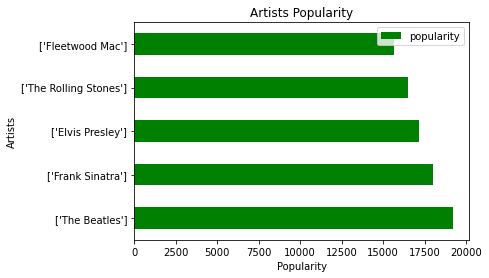

In [4]:
artists_grp = spotify_data.groupby(['artists'])

Top20artists = artists_grp[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:5]
Top20artists.plot.barh(color='green')

plt.title('Artists Popularity')
plt.xlabel('Popularity')
plt.ylabel('Artists')

plt.show()

In [5]:
pop_by_year = spotify_data.sort_values('popularity', ascending=False).groupby('year').first()
pop_by_year = pop_by_year.reset_index()
pop_year_full = pop_by_year.reset_index()
pop_by_year = pop_by_year[['year', 'artists', 'name', 'popularity']]

In [6]:
##12 April 1961 - The first man in space
pop_year_full[pop_year_full.year == 1961]

,index,year,valence,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
40,40,1961,0.343,0.941,['Elvis Presley'],0.396,182360,0.293,0,44AyOl4qVkzS48vBsbNXaC,0.000196,2,0.105,-14.062,1,Can't Help Falling in Love,78,1961-10-20,0.0275,100.307


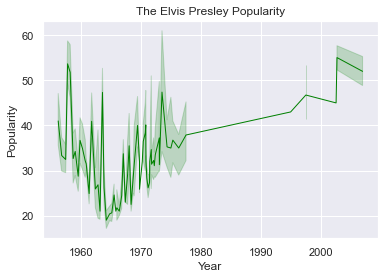

In [7]:
spotify_data['artists'] = spotify_data['artists'].apply(lambda x: x[1:-1].replace("'", ''))

Elvis = spotify_data[spotify_data['artists'] == 'Elvis Presley']

sns.set(style='darkgrid')

sns.lineplot(x='release_date', y='popularity',lw = 1, data=Elvis, color='Green')

plt.title("The Elvis Presley Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

In [8]:
# 20 July 1969 - First man on the Moon / top popular song
pop_year_full[pop_year_full.year == 1969]

,index,year,valence,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
48,48,1969,0.394,0.0339,['The Beatles'],0.557,185733,0.54,0,6dGnYIeXmHdcikdzNNDMm2,0.00248,9,0.179,-10.484,1,Here Comes The Sun - Remastered 2009,82,1969-09-26,0.0347,129.171


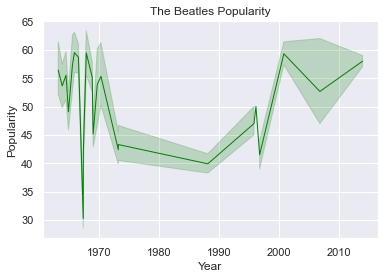

In [9]:
Beatles = spotify_data[spotify_data['artists'] == 'The Beatles']

sns.set(style='darkgrid')
sns.lineplot(x='release_date', y='popularity',lw = 1, data=Beatles, color='Green')

plt.title("The Beatles Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

In [10]:
 # February 14, 1990 - pale blue dot
 pop_year_full[pop_year_full.year == 1990]

,index,year,valence,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
69,69,1990,0.259,0.000147,['AC/DC'],0.502,292880,0.89,0,57bgtoPSgt236HzfBOd8kj,0.0117,4,0.217,-5.175,1,Thunderstruck,83,1990-09-24,0.0364,133.52


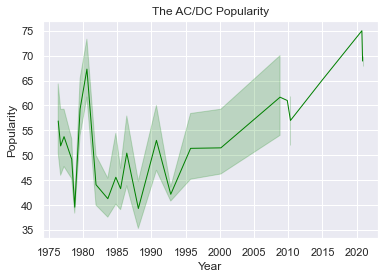

In [11]:
AcDc = spotify_data[spotify_data['artists'] == 'AC/DC']

sns.set(style='darkgrid')
sns.lineplot(x='release_date', y='popularity',lw = 1, data=AcDc, color='Green')

plt.title("The AC/DC Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

In [12]:
df_top1 = spotify_data[spotify_data['artists'] == "The Beatles"]
df_top2 = spotify_data[spotify_data['artists'] == "AC/DC"]
df_top3 = spotify_data[spotify_data['artists'] == "Elvis Presley"]

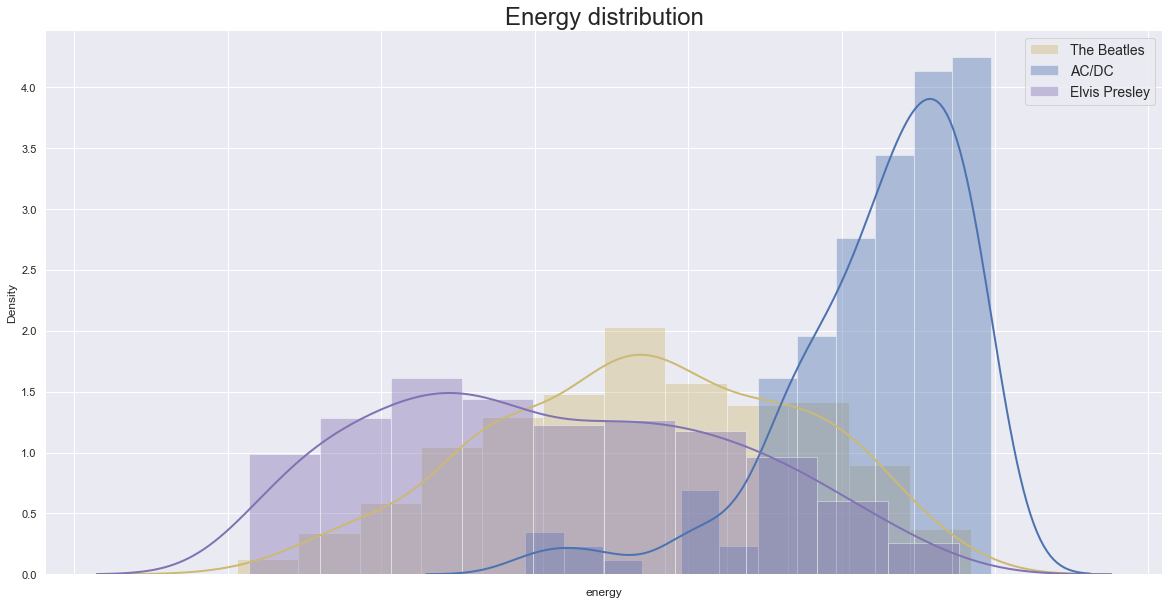

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['energy'], color='y',label="The Beatles")
sns.distplot(df_top2['energy'], color='b',label="AC/DC")
sns.distplot(df_top3['energy'], color='m',label="Elvis Presley")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('Energy distribution')
ax.legend(fontsize = 14)

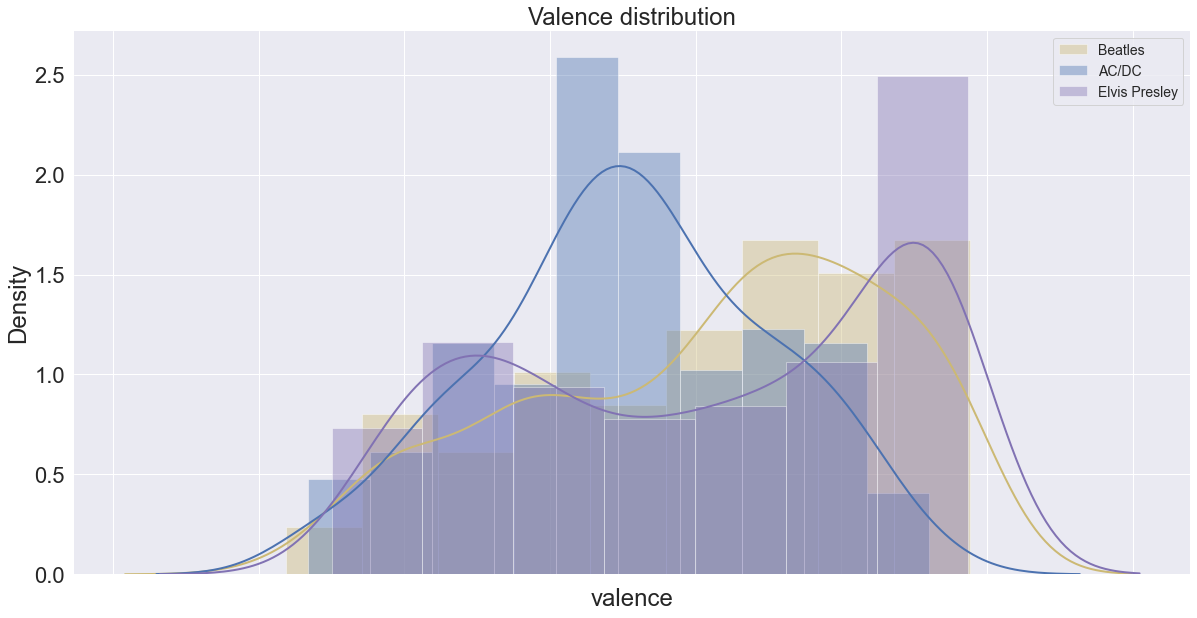

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['valence'], color='y',label="Beatles")
sns.distplot(df_top2['valence'], color='b',label="AC/DC")
sns.distplot(df_top3['valence'], color='m',label="Elvis Presley")

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('Valence distribution')
ax.legend(fontsize = 14)